# Intro to H20

## 1. Importing libraries

In [96]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# H2O specific libraries
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OXGBoostEstimator
from h2o.automl import H2OAutoML

%matplotlib inline

## 2. Loading the dataset

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_333"; Java(TM) SE Runtime Environment (build 1.8.0_333-b02); Java HotSpot(TM) 64-Bit Server VM (build 25.333-b02, mixed mode)
  Starting server from /Users/ade/opt/anaconda3/envs/ML/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/m6/k1fkbwbj4dd_22slpdg7_qtw00011k/T/tmp_yhwwsmr
  JVM stdout: /var/folders/m6/k1fkbwbj4dd_22slpdg7_qtw00011k/T/tmp_yhwwsmr/h2o_ade_started_from_python.out
  JVM stderr: /var/folders/m6/k1fkbwbj4dd_22slpdg7_qtw00011k/T/tmp_yhwwsmr/h2o_ade_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,16 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_ade_zfs39l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,14.22 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [3]:
df = h2o.import_file("../docs/diabetes.csv", destination_frame='df')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
df.describe()

Rows:768
Cols:9




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


In [5]:
df.head(5)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


## 3. Data Wrangling

Text(0.5, 0.98, 'Metrics')

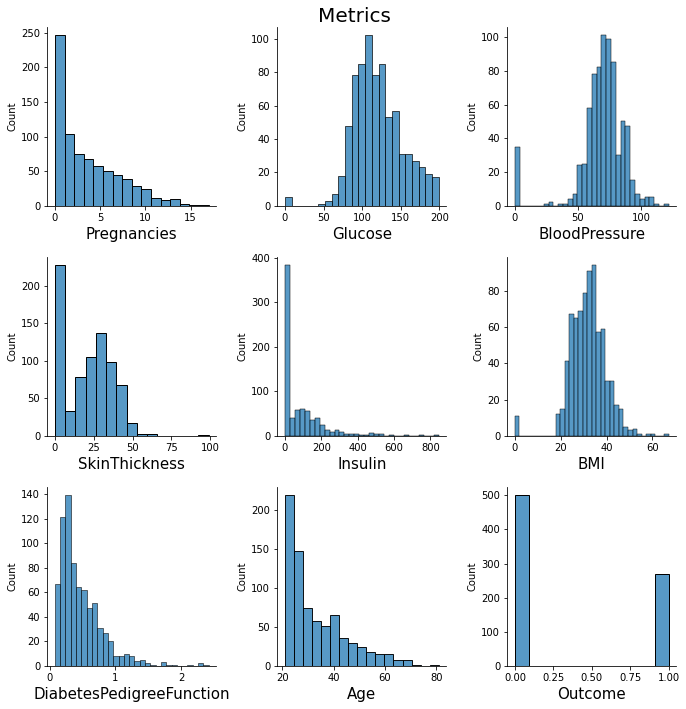

In [41]:
# Ridge plots
fig, ax = plt.subplots(3,3,figsize=(10,10))
fig.tight_layout(pad=3)
ax = ax.ravel()

for i, column in enumerate(df.columns):
    ax[i] = sns.histplot(data=df.as_data_frame(), x=column, ax=ax[i])
    ax[i].set_xlabel(column, fontsize=15)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

fig.suptitle('Metrics', fontsize=20)

Text(0.5, 1.0, 'Correlation heatmap')

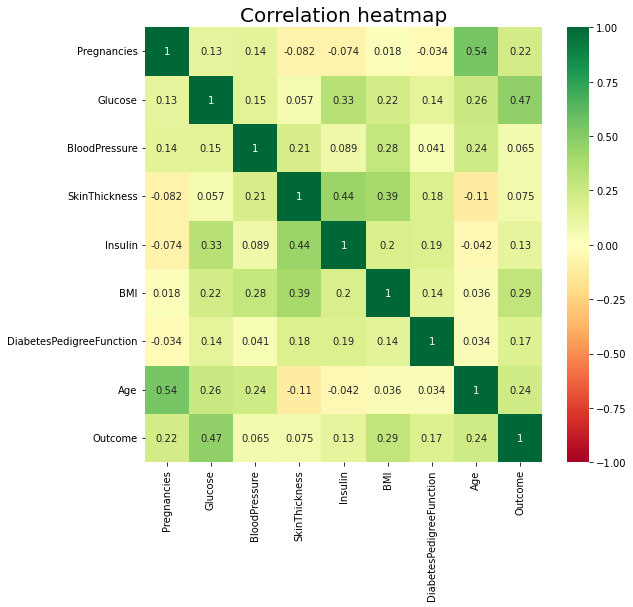

In [42]:
# Cross-correlation plots
corr = df.cor().as_data_frame()
corr.index = df.columns

# Plotting figure
fig, ax = plt.subplots(1,1,figsize=(9,8))
fig.tight_layout(pad=6)

ax = sns.heatmap(data=corr, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation heatmap', fontsize=20)

## 4. Model building

In [57]:
train, valid, test = df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  465 148 155


In [62]:
predictors = df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1655948189933_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11549.0,5.0,5.0,5.0,6.0,23.0,13.68




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05721884192287545
AUC: 0.9899262602248459
AUCPR: 0.9845164166436653
Gini: 0.9798525204496917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034: 


,,0,1,Error,Rate
0,0,290.0,9.0,0.0301,(9.0/299.0)
1,1,14.0,152.0,0.0843,(14.0/166.0)
2,Total,304.0,161.0,0.0495,(23.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.462205,0.929664,150.0
1,max f2,0.323826,0.944836,176.0
2,max f0point5,0.548022,0.967302,132.0
3,max accuracy,0.506976,0.950538,142.0
4,max precision,0.983850,1.000000,0.0
5,max recall,0.173383,1.000000,227.0
6,max specificity,0.983850,1.000000,0.0
7,max absolute_mcc,0.506976,0.892066,142.0
8,max min_per_class_accuracy,0.372134,0.939799,163.0
9,max mean_per_class_accuracy,0.370458,0.945803,164.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010753,0.964760,2.801205,2.801205,1.000000,0.970134,1.000000,0.970134,0.030120,0.030120,180.120482,180.120482,0.030120
1,2,0.021505,0.959842,2.801205,2.801205,1.000000,0.963441,1.000000,0.966788,0.030120,0.060241,180.120482,180.120482,0.060241
2,3,0.030108,0.948198,2.801205,2.801205,1.000000,0.952824,1.000000,0.962798,0.024096,0.084337,180.120482,180.120482,0.084337
3,4,0.040860,0.944016,2.801205,2.801205,1.000000,0.946246,1.000000,0.958442,0.030120,0.114458,180.120482,180.120482,0.114458
4,5,0.051613,0.940243,2.801205,2.801205,1.000000,0.942268,1.000000,0.955073,0.030120,0.144578,180.120482,180.120482,0.144578
5,6,0.101075,0.910936,2.801205,2.801205,1.000000,0.924669,1.000000,0.940194,0.138554,0.283133,180.120482,180.120482,0.283133
6,7,0.150538,0.868553,2.801205,2.801205,1.000000,0.889815,1.000000,0.923641,0.138554,0.421687,180.120482,180.120482,0.421687
7,8,0.200000,0.797054,2.801205,2.801205,1.000000,0.834641,1.000000,0.901630,0.138554,0.560241,180.120482,180.120482,0.560241
8,9,0.301075,0.556327,2.801205,2.801205,1.000000,0.680179,1.000000,0.827286,0.283133,0.843373,180.120482,180.120482,0.843373
9,10,0.400000,0.326087,1.157019,2.394578,0.413043,0.441848,0.854839,0.731963,0.114458,0.957831,15.701938,139.457831,0.867530




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-06-23 08:02:07,0.027 sec,0.0,0.479112,0.651666,0.500000,0.356989,1.000000,0.643011
1,,2022-06-23 08:02:07,0.188 sec,1.0,0.456602,0.606210,0.899111,0.841991,2.801205,0.178495
2,,2022-06-23 08:02:07,0.213 sec,2.0,0.437174,0.568855,0.918050,0.868180,2.801205,0.154839
3,,2022-06-23 08:02:07,0.245 sec,3.0,0.420575,0.537898,0.919994,0.870297,2.801205,0.156989
4,,2022-06-23 08:02:07,0.263 sec,4.0,0.405987,0.511169,0.925938,0.881996,2.801205,0.148387
5,,2022-06-23 08:02:07,0.282 sec,5.0,0.392586,0.486722,0.934239,0.894388,2.801205,0.141935
6,,2022-06-23 08:02:07,0.297 sec,6.0,0.380476,0.464792,0.937936,0.899843,2.801205,0.141935
7,,2022-06-23 08:02:07,0.311 sec,7.0,0.370456,0.446541,0.939205,0.901852,2.801205,0.139785
8,,2022-06-23 08:02:07,0.324 sec,8.0,0.362031,0.431383,0.942207,0.906607,2.801205,0.133333
9,,2022-06-23 08:02:07,0.336 sec,9.0,0.355361,0.418882,0.941834,0.907237,2.801205,0.133333



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Glucose,160.889725,1.000000,0.386115
1,BMI,107.157028,0.666028,0.257163
2,DiabetesPedigreeFunction,49.382526,0.306934,0.118512
3,Age,28.789474,0.178939,0.069091
4,BloodPressure,24.516136,0.152379,0.058836
5,Pregnancies,22.055462,0.137084,0.052930
6,Insulin,12.949581,0.080487,0.031077
7,SkinThickness,10.949017,0.068053,0.026276


In [63]:
# Testing performance on the valid dataset
perf = gbm.model_performance(valid)

In [64]:
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18115330538099383
RMSE: 0.4256210819273334
LogLoss: 0.5366686568411096
Mean Per-Class Error: 0.25621588841722254
AUC: 0.804932282191227
AUCPR: 0.6470306042290592
Gini: 0.6098645643824541

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1458393490707833: 


,,0,1,Error,Rate
0,0,53.0,44.0,0.4536,(44.0/97.0)
1,1,3.0,48.0,0.0588,(3.0/51.0)
2,Total,56.0,92.0,0.3176,(47.0/148.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.145839,0.671329,91.0
1,max f2,0.112531,0.819936,106.0
2,max f0point5,0.668426,0.642458,31.0
3,max accuracy,0.668426,0.750000,31.0
4,max precision,0.980739,1.000000,0.0
5,max recall,0.112531,1.000000,106.0
6,max specificity,0.980739,1.000000,0.0
7,max absolute_mcc,0.145839,0.477769,91.0
8,max min_per_class_accuracy,0.328581,0.686275,64.0
9,max mean_per_class_accuracy,0.145839,0.743784,91.0



Gains/Lift Table: Avg response rate: 34.46 %, avg score: 36.45 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013514,0.973098,1.450980,1.450980,0.500000,0.977228,0.500000,0.977228,0.019608,0.019608,45.098039,45.098039,0.009299
1,2,0.020270,0.966872,2.901961,1.934641,1.000000,0.972400,0.666667,0.975618,0.019608,0.039216,190.196078,93.464052,0.028906
2,3,0.033784,0.952356,2.901961,2.321569,1.000000,0.963776,0.800000,0.970881,0.039216,0.078431,190.196078,132.156863,0.068122
3,4,0.040541,0.927994,2.901961,2.418301,1.000000,0.939870,0.833333,0.965713,0.019608,0.098039,190.196078,141.830065,0.087730
4,5,0.054054,0.923162,1.450980,2.176471,0.500000,0.925415,0.750000,0.955638,0.019608,0.117647,45.098039,117.647059,0.097029
5,6,0.101351,0.892244,2.072829,2.128105,0.714286,0.906349,0.733333,0.932637,0.098039,0.215686,107.282913,112.810458,0.174449
6,7,0.155405,0.836001,2.176471,2.144928,0.750000,0.861825,0.739130,0.908006,0.117647,0.333333,117.647059,114.492754,0.271478
7,8,0.202703,0.722515,1.658263,2.031373,0.571429,0.773092,0.700000,0.876527,0.078431,0.411765,65.826331,103.137255,0.318981
8,9,0.304054,0.517149,1.547712,1.870153,0.533333,0.605657,0.644444,0.786237,0.156863,0.568627,54.771242,87.015251,0.403679
9,10,0.398649,0.409838,1.036415,1.672316,0.357143,0.461534,0.576271,0.709188,0.098039,0.666667,3.641457,67.231638,0.408935


### 4.2 Using validation dataset to tune the parameters
- Gradient Boosted Trees

In [68]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUCPR",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |

/Users/ade/opt/anaconda3/envs/ML/lib/python3.9/site-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1655948189933_149


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,46.0,46.0,13034.0,5.0,5.0,5.0,13.0,22.0,17.891304




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.16518968941442272
RMSE: 0.40643534469140685
LogLoss: 0.5115661709706083
Mean Per-Class Error: 0.1314522303259862
AUC: 0.9354776967401377
AUCPR: 0.8897929742456694
Gini: 0.8709553934802754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33018826601891127: 


,,0,1,Error,Rate
0,0,233.0,66.0,0.2207,(66.0/299.0)
1,1,7.0,159.0,0.0422,(7.0/166.0)
2,Total,240.0,225.0,0.157,(73.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.330188,0.813299,207.0
1,max f2,0.330188,0.894263,207.0
2,max f0point5,0.420919,0.826211,126.0
3,max accuracy,0.401770,0.855914,137.0
4,max precision,0.581368,1.000000,0.0
5,max recall,0.275007,1.000000,287.0
6,max specificity,0.581368,1.000000,0.0
7,max absolute_mcc,0.330188,0.706670,207.0
8,max min_per_class_accuracy,0.366930,0.846154,172.0
9,max mean_per_class_accuracy,0.330188,0.868548,207.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.61 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010753,0.568970,2.801205,2.801205,1.000000,0.572539,1.000000,0.572539,0.030120,0.030120,180.120482,180.120482,0.030120
1,2,0.021505,0.565482,2.801205,2.801205,1.000000,0.567511,1.000000,0.570025,0.030120,0.060241,180.120482,180.120482,0.060241
2,3,0.030108,0.560381,2.801205,2.801205,1.000000,0.563216,1.000000,0.568080,0.024096,0.084337,180.120482,180.120482,0.084337
3,4,0.040860,0.555895,2.801205,2.801205,1.000000,0.557806,1.000000,0.565376,0.030120,0.114458,180.120482,180.120482,0.114458
4,5,0.051613,0.550417,2.801205,2.801205,1.000000,0.553400,1.000000,0.562881,0.030120,0.144578,180.120482,180.120482,0.144578
5,6,0.101075,0.523372,2.801205,2.801205,1.000000,0.536264,1.000000,0.549856,0.138554,0.283133,180.120482,180.120482,0.283133
6,7,0.150538,0.502357,2.192247,2.601119,0.782609,0.512631,0.928571,0.537625,0.108434,0.391566,119.224725,160.111876,0.374844
7,8,0.200000,0.472793,2.557622,2.590361,0.913043,0.488762,0.924731,0.525540,0.126506,0.518072,155.762179,159.036145,0.494661
8,9,0.301075,0.405201,1.966803,2.381024,0.702128,0.440389,0.850000,0.496954,0.198795,0.716867,96.680338,138.102410,0.646633
9,10,0.400000,0.366927,1.339707,2.123494,0.478261,0.386062,0.758065,0.469529,0.132530,0.849398,33.970665,112.349398,0.698896




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.18921804289735072
RMSE: 0.43499200325678483
LogLoss: 0.5634654900419724
Mean Per-Class Error: 0.26399838285829796
AUC: 0.8019001414998989
AUCPR: 0.6808591759676361
Gini: 0.6038002829997977

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3235163299950883: 


,,0,1,Error,Rate
0,0,61.0,36.0,0.3711,(36.0/97.0)
1,1,8.0,43.0,0.1569,(8.0/51.0)
2,Total,69.0,79.0,0.2973,(44.0/148.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.323516,0.661538,78.0
1,max f2,0.273490,0.796178,109.0
2,max f0point5,0.472237,0.645161,25.0
3,max accuracy,0.472237,0.750000,25.0
4,max precision,0.565010,1.000000,0.0
5,max recall,0.260912,1.000000,119.0
6,max specificity,0.565010,1.000000,0.0
7,max absolute_mcc,0.323516,0.449653,78.0
8,max min_per_class_accuracy,0.357593,0.705882,60.0
9,max mean_per_class_accuracy,0.323516,0.736002,78.0



Gains/Lift Table: Avg response rate: 34.46 %, avg score: 35.48 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013514,0.559395,2.901961,2.901961,1.000000,0.562857,1.000000,0.562857,0.039216,0.039216,190.196078,190.196078,0.039216
1,2,0.020270,0.557053,2.901961,2.901961,1.000000,0.557918,1.000000,0.561211,0.019608,0.058824,190.196078,190.196078,0.058824
2,3,0.033784,0.554301,1.450980,2.321569,0.500000,0.555822,0.800000,0.559055,0.019608,0.078431,45.098039,132.156863,0.068122
3,4,0.040541,0.550623,2.901961,2.418301,1.000000,0.553804,0.833333,0.558180,0.019608,0.098039,190.196078,141.830065,0.087730
4,5,0.054054,0.545687,2.901961,2.539216,1.000000,0.548461,0.875000,0.555750,0.039216,0.137255,190.196078,153.921569,0.126946
5,6,0.101351,0.514323,2.072829,2.321569,0.714286,0.530000,0.800000,0.543734,0.098039,0.235294,107.282913,132.156863,0.204366
6,7,0.155405,0.483317,1.813725,2.144928,0.625000,0.495476,0.739130,0.526949,0.098039,0.333333,81.372549,114.492754,0.271478
7,8,0.202703,0.449802,1.658263,2.031373,0.571429,0.468498,0.700000,0.513310,0.078431,0.411765,65.826331,103.137255,0.318981
8,9,0.304054,0.403333,1.547712,1.870153,0.533333,0.420919,0.644444,0.482513,0.156863,0.568627,54.771242,87.015251,0.403679
9,10,0.398649,0.361932,1.036415,1.672316,0.357143,0.382910,0.576271,0.458879,0.098039,0.666667,3.641457,67.231638,0.408935




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-23 08:10:14,0.018 sec,0.0,0.479112,0.651666,0.500000,0.356989,1.000000,0.643011,0.475398,0.644373,0.500000,0.344595,1.000000,0.655405
1,,2022-06-23 08:10:14,0.037 sec,1.0,0.476998,0.647270,0.865808,0.783919,2.641136,0.223656,0.473919,0.641318,0.787447,0.672068,2.901961,0.364865
2,,2022-06-23 08:10:14,0.048 sec,2.0,0.474953,0.643043,0.900784,0.839639,2.801205,0.176344,0.472391,0.638174,0.809480,0.694902,2.901961,0.297297
3,,2022-06-23 08:10:14,0.057 sec,3.0,0.472849,0.638719,0.913054,0.860657,2.801205,0.167742,0.471288,0.635911,0.802203,0.660827,2.901961,0.304054
4,,2022-06-23 08:10:14,0.067 sec,4.0,0.470795,0.634518,0.915653,0.868230,2.801205,0.159140,0.469959,0.633193,0.803315,0.680394,2.901961,0.331081
5,,2022-06-23 08:10:14,0.075 sec,5.0,0.469410,0.631697,0.922362,0.869177,2.801205,0.152688,0.469225,0.631698,0.798464,0.678101,2.901961,0.304054
6,,2022-06-23 08:10:14,0.084 sec,6.0,0.467354,0.627533,0.926401,0.876527,2.801205,0.163441,0.468107,0.629426,0.792602,0.673781,2.901961,0.283784
7,,2022-06-23 08:10:14,0.093 sec,7.0,0.465395,0.623587,0.925736,0.879003,2.801205,0.169892,0.466752,0.626679,0.801294,0.677951,2.901961,0.277027
8,,2022-06-23 08:10:14,0.102 sec,8.0,0.463343,0.619472,0.926492,0.877016,2.801205,0.165591,0.465326,0.623797,0.815646,0.700983,2.901961,0.277027
9,,2022-06-23 08:10:14,0.110 sec,9.0,0.461292,0.615385,0.924356,0.875085,2.801205,0.165591,0.463992,0.621111,0.814332,0.707035,2.901961,0.270270



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Glucose,642.617126,1.000000,0.474699
1,BMI,326.467041,0.508027,0.241160
2,DiabetesPedigreeFunction,115.843826,0.180269,0.085573
3,Age,94.272881,0.146701,0.069639
4,Pregnancies,59.388012,0.092416,0.043870
5,SkinThickness,41.003922,0.063808,0.030289
6,Insulin,39.455326,0.061398,0.029145
7,BloodPressure,34.689144,0.053981,0.025625


In [69]:
# Obtaining the AUC
gbm_tune.model_performance(valid=valid).auc()

0.8019001414998989

In [70]:
gbm_tune.model_performance(valid=valid).aucpr()

0.6808591759676361

### 4.3 Grid Search with Gradient Boosted Trees

In [72]:
gbm_gs = H2OGradientBoostingEstimator(
            ntrees = 3000,
            learn_rate = 0.01,
            stopping_rounds = 20,
            stopping_metric = "AUCPR",
            col_sample_rate = 0.7,
            sample_rate = 0.7,
            seed = 1234)  

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_gs, 
                     hyper_params,
                     grid_id='depth_grid',
                     search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
     max_depth           model_ids   logloss
0         10.0  depth_grid_model_4  0.559748
1         12.0  depth_grid_model_5  0.559758
2          8.0  depth_grid_model_3  0.560585
3          6.0  depth_grid_model_2  0.561251
4          4.0  depth_grid_model_1  0.566245


In [78]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

     max_depth           model_ids       auc
0         10.0  depth_grid_model_4  0.806549
1         12.0  depth_grid_model_5  0.806549
2          6.0  depth_grid_model_2  0.803315
3          8.0  depth_grid_model_3  0.803315
4          4.0  depth_grid_model_1  0.798666



### 4.4 Grid Search with CV

In [79]:
gbm_cv = H2OGradientBoostingEstimator(
            ntrees = 3000,
            learn_rate = 0.01,
            stopping_rounds = 20,
            stopping_metric = "AUCPR",
            col_sample_rate = 0.7,
            sample_rate = 0.7,
            nfolds=4,
            seed = 1234)  

gbm_cv.train(x = predictors, y = response, training_frame = train, validation_frame=valid)

gbm Model Build progress: |

/Users/ade/opt/anaconda3/envs/ML/lib/python3.9/site-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1655948189933_722


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,54.0,54.0,15225.0,5.0,5.0,5.0,13.0,22.0,17.777779




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.15787726452765352
RMSE: 0.39733772099770936
LogLoss: 0.49495756116259293
Mean Per-Class Error: 0.1398436555586896
AUC: 0.9369686102268606
AUCPR: 0.8932078707182242
Gini: 0.8739372204537212

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36795968465663687: 


,,0,1,Error,Rate
0,0,255.0,44.0,0.1472,(44.0/299.0)
1,1,22.0,144.0,0.1325,(22.0/166.0)
2,Total,277.0,188.0,0.1419,(66.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.367960,0.813559,173.0
1,max f2,0.325175,0.890258,211.0
2,max f0point5,0.464619,0.824916,99.0
3,max accuracy,0.402563,0.858065,140.0
4,max precision,0.610432,1.000000,0.0
5,max recall,0.262568,1.000000,295.0
6,max specificity,0.610432,1.000000,0.0
7,max absolute_mcc,0.367960,0.703221,173.0
8,max min_per_class_accuracy,0.369993,0.852843,171.0
9,max mean_per_class_accuracy,0.330447,0.864196,204.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010753,0.597640,2.801205,2.801205,1.000000,0.602581,1.000000,0.602581,0.030120,0.030120,180.120482,180.120482,0.030120
1,2,0.021505,0.593669,2.801205,2.801205,1.000000,0.595839,1.000000,0.599210,0.030120,0.060241,180.120482,180.120482,0.060241
2,3,0.030108,0.588943,2.801205,2.801205,1.000000,0.590718,1.000000,0.596784,0.024096,0.084337,180.120482,180.120482,0.084337
3,4,0.040860,0.582387,2.801205,2.801205,1.000000,0.585245,1.000000,0.593747,0.030120,0.114458,180.120482,180.120482,0.114458
4,5,0.051613,0.573069,2.801205,2.801205,1.000000,0.577687,1.000000,0.590402,0.030120,0.144578,180.120482,180.120482,0.144578
5,6,0.101075,0.543950,2.801205,2.801205,1.000000,0.559131,1.000000,0.575099,0.138554,0.283133,180.120482,180.120482,0.283133
6,7,0.150538,0.522241,2.192247,2.601119,0.782609,0.532864,0.928571,0.561222,0.108434,0.391566,119.224725,160.111876,0.374844
7,8,0.200000,0.484546,2.557622,2.590361,0.913043,0.506691,0.924731,0.547736,0.126506,0.518072,155.762179,159.036145,0.494661
8,9,0.301075,0.413832,1.966803,2.381024,0.702128,0.452619,0.850000,0.515804,0.198795,0.716867,96.680338,138.102410,0.646633
9,10,0.400000,0.368956,1.400602,2.138554,0.500000,0.390823,0.763441,0.484894,0.138554,0.855422,40.060241,113.855422,0.708264




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.18555161492876743
RMSE: 0.430757025396879
LogLoss: 0.5548445819058185
Mean Per-Class Error: 0.2541944612896705
AUC: 0.8021022842126541
AUCPR: 0.6753879234900153
Gini: 0.6042045684253081

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32176574760184184: 


,,0,1,Error,Rate
0,0,61.0,36.0,0.3711,(36.0/97.0)
1,1,7.0,44.0,0.1373,(7.0/51.0)
2,Total,68.0,80.0,0.2905,(43.0/148.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.321766,0.671756,79.0
1,max f2,0.261679,0.793651,110.0
2,max f0point5,0.485165,0.645161,25.0
3,max accuracy,0.485165,0.750000,25.0
4,max precision,0.596173,1.000000,0.0
5,max recall,0.244930,1.000000,123.0
6,max specificity,0.596173,1.000000,0.0
7,max absolute_mcc,0.321766,0.468806,79.0
8,max min_per_class_accuracy,0.356257,0.705882,62.0
9,max mean_per_class_accuracy,0.321766,0.745806,79.0



Gains/Lift Table: Avg response rate: 34.46 %, avg score: 35.59 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013514,0.588665,2.901961,2.901961,1.000000,0.594730,1.000000,0.594730,0.039216,0.039216,190.196078,190.196078,0.039216
1,2,0.020270,0.583259,2.901961,2.901961,1.000000,0.583453,1.000000,0.590971,0.019608,0.058824,190.196078,190.196078,0.058824
2,3,0.033784,0.578622,1.450980,2.321569,0.500000,0.582030,0.800000,0.587395,0.019608,0.078431,45.098039,132.156863,0.068122
3,4,0.040541,0.575239,2.901961,2.418301,1.000000,0.575468,0.833333,0.585407,0.019608,0.098039,190.196078,141.830065,0.087730
4,5,0.054054,0.575054,2.901961,2.539216,1.000000,0.575205,0.875000,0.582856,0.039216,0.137255,190.196078,153.921569,0.126946
5,6,0.101351,0.536521,2.072829,2.321569,0.714286,0.553495,0.800000,0.569154,0.098039,0.235294,107.282913,132.156863,0.204366
6,7,0.155405,0.500644,1.813725,2.144928,0.625000,0.514475,0.739130,0.550136,0.098039,0.333333,81.372549,114.492754,0.271478
7,8,0.202703,0.461625,1.658263,2.031373,0.571429,0.480707,0.700000,0.533935,0.078431,0.411765,65.826331,103.137255,0.318981
8,9,0.304054,0.409881,1.547712,1.870153,0.533333,0.432686,0.644444,0.500186,0.156863,0.568627,54.771242,87.015251,0.403679
9,10,0.398649,0.369694,1.036415,1.672316,0.357143,0.390250,0.576271,0.474099,0.098039,0.666667,3.641457,67.231638,0.408935




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.1953296582819911
RMSE: 0.4419611501953436
LogLoss: 0.5749256715484408
Mean Per-Class Error: 0.2532739654269251
AUC: 0.7745899987911512
AUCPR: 0.6221648478944396
Gini: 0.5491799975823024

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34818245100870415: 


,,0,1,Error,Rate
0,0,234.0,65.0,0.2174,(65.0/299.0)
1,1,48.0,118.0,0.2892,(48.0/166.0)
2,Total,282.0,183.0,0.243,(113.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.348182,0.676218,168.0
1,max f2,0.270437,0.771120,302.0
2,max f0point5,0.370140,0.657248,149.0
3,max accuracy,0.348182,0.756989,168.0
4,max precision,0.699668,1.000000,0.0
5,max recall,0.163985,1.000000,396.0
6,max specificity,0.699668,1.000000,0.0
7,max absolute_mcc,0.348182,0.483932,168.0
8,max min_per_class_accuracy,0.338742,0.729097,185.0
9,max mean_per_class_accuracy,0.348182,0.746726,168.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 34.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010753,0.690491,2.240964,2.240964,0.800000,0.697688,0.800000,0.697688,0.024096,0.024096,124.096386,124.096386,0.020752
1,2,0.021505,0.659806,2.240964,2.240964,0.800000,0.677397,0.800000,0.687542,0.024096,0.048193,124.096386,124.096386,0.041504
2,3,0.030108,0.645406,2.801205,2.401033,1.000000,0.653671,0.857143,0.677865,0.024096,0.072289,180.120482,140.103270,0.065600
3,4,0.040860,0.637821,1.680723,2.211477,0.600000,0.642806,0.789474,0.668639,0.018072,0.090361,68.072289,121.147749,0.076984
4,5,0.051613,0.622651,0.560241,1.867470,0.200000,0.630411,0.666667,0.660675,0.006024,0.096386,-43.975904,86.746988,0.069630
5,6,0.101075,0.518037,1.705081,1.788003,0.608696,0.576284,0.638298,0.619377,0.084337,0.180723,70.508119,78.800308,0.123867
6,7,0.150538,0.457233,1.826873,1.800775,0.652174,0.478251,0.642857,0.573007,0.090361,0.271084,82.687271,80.077453,0.187472
7,8,0.200000,0.438590,1.948664,1.837349,0.695652,0.447653,0.655914,0.542005,0.096386,0.367470,94.866422,83.734940,0.260446
8,9,0.301075,0.392616,1.847603,1.840792,0.659574,0.416165,0.657143,0.499759,0.186747,0.554217,84.760318,84.079174,0.393682
9,10,0.400000,0.346937,1.583290,1.777108,0.565217,0.367772,0.634409,0.467117,0.156627,0.710843,58.328968,77.710843,0.483419




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.766010,0.022740,0.745455,0.750000,0.794392,0.774193
1,auc,0.815319,0.046630,0.830529,0.852841,0.830747,0.747159
2,err,0.233990,0.022740,0.254545,0.250000,0.205607,0.225806
3,err_count,27.250000,3.774917,28.000000,31.000000,22.000000,28.000000
4,f0point5,0.652975,0.066407,0.581897,0.704607,0.714286,0.611111
5,f1,0.700222,0.078054,0.658537,0.770370,0.760870,0.611111
6,f2,0.758291,0.105057,0.758427,0.849673,0.813953,0.611111
7,lift_top_group,2.160010,0.922881,3.437500,2.175439,1.304878,1.722222
8,logloss,0.557750,0.053559,0.500943,0.624165,0.574411,0.531480
9,max_per_class_error,0.328561,0.072420,0.294872,0.388060,0.242424,0.388889



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-23 08:18:10,1.068 sec,0.0,0.479112,0.651666,0.500000,0.356989,1.000000,0.643011,0.475398,0.644373,0.500000,0.344595,1.000000,0.655405
1,,2022-06-23 08:18:10,1.074 sec,1.0,0.476998,0.647270,0.865808,0.783919,2.641136,0.223656,0.473919,0.641318,0.787447,0.672068,2.901961,0.364865
2,,2022-06-23 08:18:10,1.079 sec,2.0,0.474953,0.643043,0.900784,0.839639,2.801205,0.176344,0.472391,0.638174,0.809480,0.694902,2.901961,0.297297
3,,2022-06-23 08:18:10,1.085 sec,3.0,0.472849,0.638719,0.913054,0.860657,2.801205,0.167742,0.471288,0.635911,0.802203,0.660827,2.901961,0.304054
4,,2022-06-23 08:18:10,1.089 sec,4.0,0.470795,0.634518,0.915653,0.868230,2.801205,0.159140,0.469959,0.633193,0.803315,0.680394,2.901961,0.331081
5,,2022-06-23 08:18:10,1.094 sec,5.0,0.469410,0.631697,0.922362,0.869177,2.801205,0.152688,0.469225,0.631698,0.798464,0.678101,2.901961,0.304054
6,,2022-06-23 08:18:10,1.100 sec,6.0,0.467354,0.627533,0.926401,0.876527,2.801205,0.163441,0.468107,0.629426,0.792602,0.673781,2.901961,0.283784
7,,2022-06-23 08:18:10,1.105 sec,7.0,0.465395,0.623587,0.925736,0.879003,2.801205,0.169892,0.466752,0.626679,0.801294,0.677951,2.901961,0.277027
8,,2022-06-23 08:18:10,1.112 sec,8.0,0.463343,0.619472,0.926492,0.877016,2.801205,0.165591,0.465326,0.623797,0.815646,0.700983,2.901961,0.277027
9,,2022-06-23 08:18:10,1.133 sec,9.0,0.461292,0.615385,0.924356,0.875085,2.801205,0.165591,0.463992,0.621111,0.814332,0.707035,2.901961,0.270270



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Glucose,707.632874,1.000000,0.468774
1,BMI,358.397766,0.506474,0.237422
2,DiabetesPedigreeFunction,135.350601,0.191272,0.089663
3,Age,107.879425,0.152451,0.071465
4,Pregnancies,68.258377,0.096460,0.045218
5,SkinThickness,45.313015,0.064035,0.030018
6,BloodPressure,43.557098,0.061553,0.028855
7,Insulin,43.151138,0.060980,0.028586


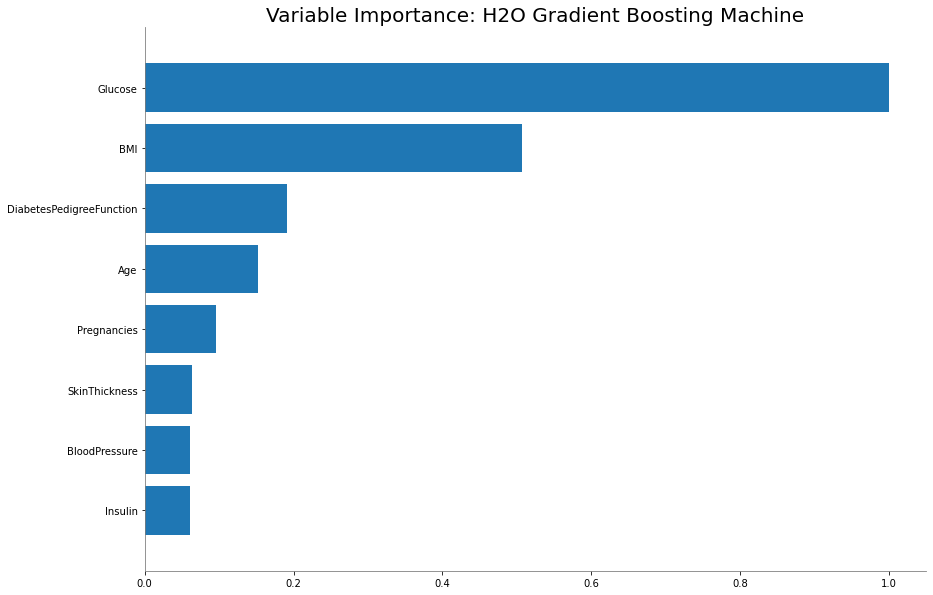

<Figure size 432x288 with 0 Axes>

In [94]:
gbm_cv.varimp_plot()

In [81]:
M = gbm_cv.cross_validation_metrics_summary().as_data_frame()
M.set_index(M.columns[0], inplace=True)

In [89]:
# Computing the mean of the metrics across the cross-validated data sets
M['mean_cv'] = M.apply(lambda x: np.mean([x['cv_'+str(i) + '_valid'] for i in range(1,5)]), axis=1)

In [90]:
M

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,mean_cv
,,,,,,,
accuracy,0.766010,0.022740,0.745455,0.750000,0.794392,0.774193,0.766010
auc,0.815319,0.046630,0.830529,0.852841,0.830747,0.747159,0.815319
err,0.233990,0.022740,0.254545,0.250000,0.205607,0.225806,0.233990
err_count,27.250000,3.774917,28.000000,31.000000,22.000000,28.000000,27.250000
f0point5,0.652975,0.066407,0.581897,0.704607,0.714286,0.611111,0.652975
f1,0.700222,0.078054,0.658537,0.770370,0.760870,0.611111,0.700222
f2,0.758291,0.105057,0.758427,0.849673,0.813953,0.611111,0.758291
lift_top_group,2.160010,0.922881,3.437500,2.175439,1.304878,1.722222,2.160010
logloss,0.557750,0.053559,0.500943,0.624165,0.574411,0.531480,0.557750


### 4.4 With XG Boost (Trees with regularizaton)

In [92]:
cv_xgb = H2OXGBoostEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

xgboost Model Build progress: |

/Users/ade/opt/anaconda3/envs/ML/lib/python3.9/site-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%


0.7982615726703053

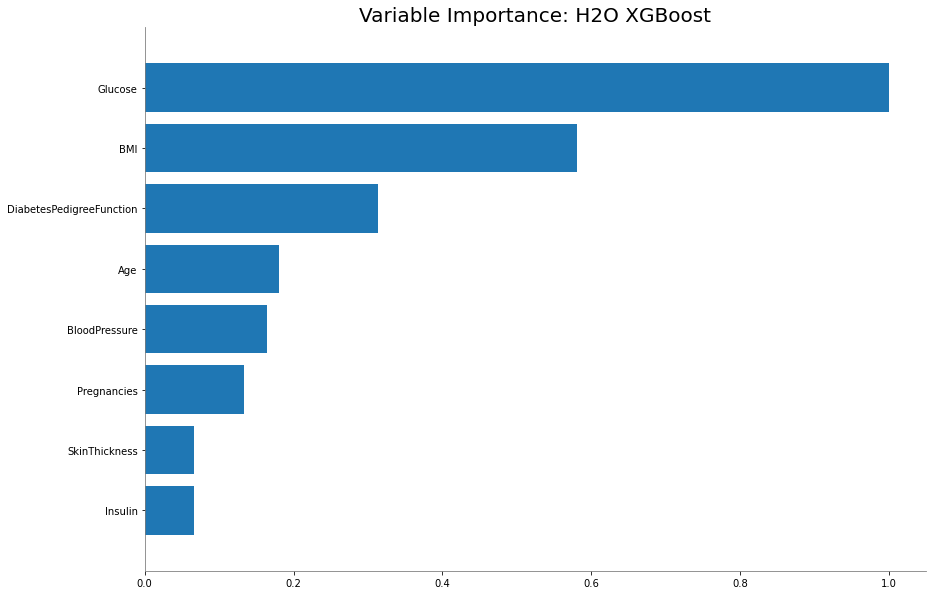

<Figure size 432x288 with 0 Axes>

In [95]:
# Feature importance plot
cv_xgb.varimp_plot()

### 4.5 H2O Auto ML

In [97]:
aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
08:46:38.561: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_1_20220623_84638


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,42.0,42.0,45664.0,10.0,17.0,13.452381,65.0,100.0,81.666664




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.16440960271068342
RMSE: 0.4054745401510228
LogLoss: 0.8344361335366673
Mean Per-Class Error: 0.23919087722125965
AUC: 0.8153785711407503
AUCPR: 0.700970825419835
Gini: 0.6307571422815006

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35: 


,,0,1,Error,Rate
0,0,210.0,89.0,0.2977,(89.0/299.0)
1,1,30.0,136.0,0.1807,(30.0/166.0)
2,Total,240.0,225.0,0.2559,(119.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.350000,0.695652,85.0
1,max f2,0.266667,0.786638,101.0
2,max f0point5,0.482270,0.681818,56.0
3,max accuracy,0.482270,0.772043,56.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,150.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.482270,0.500879,56.0
8,max min_per_class_accuracy,0.411765,0.746988,72.0
9,max mean_per_class_accuracy,0.350000,0.760809,85.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 36.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010753,0.938824,2.240964,2.240964,0.800000,0.966471,0.800000,0.966471,0.024096,0.024096,124.096386,124.096386,0.020752
1,2,0.021505,0.895059,2.801205,2.521084,1.000000,0.928333,0.900000,0.947402,0.030120,0.054217,180.120482,152.108434,0.050872
2,3,0.032258,0.875000,1.680723,2.240964,0.600000,0.877941,0.800000,0.924248,0.018072,0.072289,68.072289,124.096386,0.062256
3,4,0.043011,0.857143,2.240964,2.240964,0.800000,0.857143,0.800000,0.907472,0.024096,0.096386,124.096386,124.096386,0.083008
4,5,0.053763,0.842105,2.801205,2.353012,1.000000,0.846073,0.840000,0.895192,0.030120,0.126506,180.120482,135.301205,0.113128
5,6,0.101075,0.787970,2.291895,2.324404,0.818182,0.817126,0.829787,0.858651,0.108434,0.234940,129.189485,132.440400,0.208184
6,7,0.150538,0.722909,2.070456,2.240964,0.739130,0.755820,0.800000,0.824863,0.102410,0.337349,107.045574,124.096386,0.290527
7,8,0.202151,0.666667,1.750753,2.115804,0.625000,0.689911,0.755319,0.790407,0.090361,0.427711,75.075301,111.580364,0.350788
8,9,0.303226,0.529412,1.668803,1.966803,0.595745,0.585509,0.702128,0.722108,0.168675,0.596386,66.880287,96.680338,0.455917
9,10,0.402151,0.428571,1.157019,1.767605,0.413043,0.478052,0.631016,0.662073,0.114458,0.710843,15.701938,76.760518,0.480074




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.17229692194273172
RMSE: 0.41508664389827304
LogLoss: 0.501410044540819
Mean Per-Class Error: 0.2691530220335557
AUC: 0.8009904992925005
AUCPR: 0.6966438472127967
Gini: 0.6019809985850011

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2857142857142857: 


,,0,1,Error,Rate
0,0,60.0,37.0,0.3814,(37.0/97.0)
1,1,8.0,43.0,0.1569,(8.0/51.0)
2,Total,68.0,80.0,0.3041,(45.0/148.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.285714,0.656489,41.0
1,max f2,0.119048,0.798722,54.0
2,max f0point5,0.761905,0.650407,8.0
3,max accuracy,0.761905,0.750000,8.0
4,max precision,0.952381,1.000000,0.0
5,max recall,0.095238,1.000000,56.0
6,max specificity,0.952381,1.000000,0.0
7,max absolute_mcc,0.315096,0.440748,39.0
8,max min_per_class_accuracy,0.380952,0.711340,34.0
9,max mean_per_class_accuracy,0.315096,0.731858,39.0



Gains/Lift Table: Avg response rate: 34.46 %, avg score: 35.67 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.033784,0.928571,2.901961,2.901961,1.000000,0.933333,1.000000,0.933333,0.098039,0.098039,190.196078,190.196078,0.098039
1,2,0.033784,0.909048,0.000000,2.901961,0.000000,0.000000,1.000000,0.933333,0.000000,0.098039,-100.000000,190.196078,0.098039
2,3,0.054054,0.880952,2.901961,2.901961,1.000000,0.880952,1.000000,0.913690,0.058824,0.156863,190.196078,190.196078,0.156863
3,4,0.054054,0.872619,0.000000,2.901961,0.000000,0.000000,1.000000,0.913690,0.000000,0.156863,-100.000000,190.196078,0.156863
4,5,0.101351,0.764048,2.487395,2.708497,0.857143,0.804762,0.933333,0.862857,0.117647,0.274510,148.739496,170.849673,0.264201
5,6,0.155405,0.713374,1.088235,2.144928,0.375000,0.742063,0.739130,0.820842,0.058824,0.333333,8.823529,114.492754,0.271478
6,7,0.209459,0.642857,1.450980,1.965844,0.500000,0.670339,0.677419,0.782003,0.078431,0.411765,45.098039,96.584440,0.308672
7,8,0.310811,0.500000,1.354248,1.766411,0.466667,0.548311,0.608696,0.705799,0.137255,0.549020,35.424837,76.641091,0.363453
8,9,0.405405,0.404762,1.450980,1.692810,0.500000,0.433279,0.583333,0.642211,0.137255,0.686275,45.098039,69.281046,0.428543
9,10,0.500000,0.312310,1.243697,1.607843,0.428571,0.363752,0.554054,0.589529,0.117647,0.803922,24.369748,60.784314,0.463715




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.15154308101802944
RMSE: 0.38928534652363866
LogLoss: 0.6698533159343569
Mean Per-Class Error: 0.2301547326429464
AUC: 0.8406938791957126
AUCPR: 0.7538605020823073
Gini: 0.6813877583914252

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31999999999999995: 


,,0,1,Error,Rate
0,0,210.0,89.0,0.2977,(89.0/299.0)
1,1,27.0,139.0,0.1627,(27.0/166.0)
2,Total,237.0,228.0,0.2495,(116.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.320000,0.705584,81.0
1,max f2,0.180000,0.792181,110.0
2,max f0point5,0.656667,0.725490,33.0
3,max accuracy,0.520000,0.787097,53.0
4,max precision,0.971429,1.000000,0.0
5,max recall,0.000000,1.000000,136.0
6,max specificity,0.971429,1.000000,0.0
7,max absolute_mcc,0.440000,0.529085,67.0
8,max min_per_class_accuracy,0.380000,0.765886,75.0
9,max mean_per_class_accuracy,0.320000,0.769845,81.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.012903,0.920000,2.334337,2.334337,0.833333,0.941905,0.833333,0.941905,0.030120,0.030120,133.433735,133.433735,0.026776
1,2,0.021505,0.884114,2.801205,2.521084,1.000000,0.900000,0.900000,0.925143,0.024096,0.054217,180.120482,152.108434,0.050872
2,3,0.034409,0.880000,2.334337,2.451054,0.833333,0.880000,0.875000,0.908214,0.030120,0.084337,133.433735,145.105422,0.077648
3,4,0.047312,0.860000,2.801205,2.546550,1.000000,0.860417,0.909091,0.895179,0.036145,0.120482,180.120482,154.654984,0.113793
4,5,0.053763,0.840000,2.801205,2.577108,1.000000,0.843333,0.920000,0.888957,0.018072,0.138554,180.120482,157.710843,0.131865
5,6,0.105376,0.742857,2.217620,2.401033,0.791667,0.781994,0.857143,0.836567,0.114458,0.253012,121.762048,140.103270,0.229601
6,7,0.150538,0.695500,2.534423,2.441050,0.904762,0.717718,0.871429,0.800912,0.114458,0.367470,153.442341,144.104991,0.337370
7,8,0.202151,0.640000,1.984187,2.324404,0.708333,0.661498,0.829787,0.765317,0.102410,0.469880,98.418675,132.440400,0.416368
8,9,0.301075,0.512679,1.522394,2.060886,0.543478,0.575536,0.735714,0.702960,0.150602,0.620482,52.239392,106.088640,0.496736
9,10,0.412903,0.400000,1.185125,1.823701,0.423077,0.451052,0.651042,0.634735,0.132530,0.753012,18.512512,82.370105,0.528932




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.791398,0.040662,0.838710,0.774193,0.806452,0.731183,0.806452
1,auc,0.837549,0.019566,0.857143,0.812562,0.856142,0.824230,0.837669
2,err,0.208602,0.040662,0.161290,0.225806,0.193548,0.268817,0.193548
3,err_count,19.400000,3.781534,15.000000,21.000000,18.000000,25.000000,18.000000
4,f0point5,0.703834,0.023625,0.740741,0.686813,0.686275,0.691057,0.714286
5,f1,0.719463,0.027058,0.761905,0.704225,0.700000,0.731183,0.700000
6,f2,0.736735,0.042063,0.784314,0.722543,0.714286,0.776256,0.686275
7,lift_top_group,1.808438,1.660104,3.100000,2.735294,3.206897,0.000000,0.000000
8,logloss,0.673691,0.307085,0.769231,1.170734,0.435954,0.524093,0.468445
9,max_per_class_error,0.279296,0.053165,0.200000,0.264706,0.275862,0.333333,0.322581



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-23 08:46:40,0.320 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-06-23 08:46:40,0.339 sec,5.0,0.513966,6.706648,0.689726,0.537397,1.716867,0.342857,0.433081,1.387083,0.766929,0.635615,2.487395,0.324324
2,,2022-06-23 08:46:40,0.361 sec,10.0,0.460863,3.627067,0.746510,0.584566,1.820783,0.316703,0.418183,0.509922,0.792197,0.670478,2.901961,0.317568
3,,2022-06-23 08:46:40,0.378 sec,15.0,0.433738,2.115143,0.782027,0.629866,2.000861,0.263499,0.410124,0.498852,0.802911,0.706439,2.901961,0.290541
4,,2022-06-23 08:46:40,0.395 sec,20.0,0.420591,1.535870,0.799301,0.653096,2.037240,0.281720,0.416608,0.508282,0.795937,0.698244,2.901961,0.283784
5,,2022-06-23 08:46:40,0.412 sec,25.0,0.418299,1.331980,0.799553,0.660167,2.000861,0.258065,0.413644,0.496948,0.801597,0.701467,2.901961,0.304054
6,,2022-06-23 08:46:40,0.431 sec,30.0,0.410168,1.045066,0.810946,0.678849,2.000861,0.245161,0.416312,0.504992,0.795432,0.684025,2.901961,0.304054
7,,2022-06-23 08:46:40,0.449 sec,35.0,0.410603,0.978055,0.808468,0.680608,1.680723,0.249462,0.414707,0.501719,0.798565,0.691033,2.901961,0.263514
8,,2022-06-23 08:46:40,0.465 sec,40.0,0.407985,0.838591,0.811661,0.684110,2.240964,0.258065,0.414185,0.500091,0.800889,0.692525,2.901961,0.283784
9,,2022-06-23 08:46:40,0.475 sec,42.0,0.405475,0.834436,0.815379,0.700971,2.240964,0.255914,0.415087,0.501410,0.800990,0.696644,2.901961,0.304054



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Glucose,929.600952,1.000000,0.307034
1,BMI,478.234161,0.514451,0.157954
2,DiabetesPedigreeFunction,369.895142,0.397907,0.122171
3,Age,334.504486,0.359837,0.110482
4,Pregnancies,267.205322,0.287441,0.088254
5,BloodPressure,243.634857,0.262085,0.080469
6,Insulin,208.704575,0.224510,0.068932
7,SkinThickness,195.899902,0.210735,0.064703


In [98]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_1_20220623_84638,0.840694,0.669853,0.753861,0.230155,0.389285,0.151543
StackedEnsemble_BestOfFamily_1_AutoML_1_20220623_84638,0.834247,0.478244,0.720657,0.23221,0.391582,0.153337
GBM_4_AutoML_1_20220623_84638,0.832121,0.473359,0.7492,0.235877,0.390696,0.152643
GLM_1_AutoML_1_20220623_84638,0.831638,0.488798,0.716653,0.238204,0.395915,0.156749
GBM_2_AutoML_1_20220623_84638,0.829985,0.480355,0.727995,0.238234,0.394038,0.155266
StackedEnsemble_AllModels_1_AutoML_1_20220623_84638,0.828968,0.484061,0.718577,0.238909,0.395498,0.156418
XRT_1_AutoML_1_20220623_84638,0.825976,0.555213,0.72196,0.232532,0.399288,0.159431
GBM_3_AutoML_1_20220623_84638,0.821655,0.490684,0.719058,0.251904,0.398949,0.15916
XGBoost_1_AutoML_1_20220623_84638,0.821453,0.490799,0.70215,0.245255,0.401272,0.161019
GBM_1_AutoML_1_20220623_84638,0.81827,0.497094,0.680491,0.237871,0.403979,0.163199


In [100]:
lb.sort(by='auc', ascending=False)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_1_20220623_84638,0.840694,0.669853,0.753861,0.230155,0.389285,0.151543
StackedEnsemble_BestOfFamily_1_AutoML_1_20220623_84638,0.834247,0.478244,0.720657,0.23221,0.391582,0.153337
GBM_4_AutoML_1_20220623_84638,0.832121,0.473359,0.7492,0.235877,0.390696,0.152643
GLM_1_AutoML_1_20220623_84638,0.831638,0.488798,0.716653,0.238204,0.395915,0.156749
GBM_2_AutoML_1_20220623_84638,0.829985,0.480355,0.727995,0.238234,0.394038,0.155266
StackedEnsemble_AllModels_1_AutoML_1_20220623_84638,0.828968,0.484061,0.718577,0.238909,0.395498,0.156418
XRT_1_AutoML_1_20220623_84638,0.825976,0.555213,0.72196,0.232532,0.399288,0.159431
GBM_3_AutoML_1_20220623_84638,0.821655,0.490684,0.719058,0.251904,0.398949,0.15916
XGBoost_1_AutoML_1_20220623_84638,0.821453,0.490799,0.70215,0.245255,0.401272,0.161019
GBM_1_AutoML_1_20220623_84638,0.81827,0.497094,0.680491,0.237871,0.403979,0.163199
